**Notebook elaborado por:**

*   Wilson Antony Mamani Machaca (wilson.antony.mm@gmail.com)
*   Jose Emmanuel Cruz de la Cruz (jeccruz@yahoo.com)



**Importar Librerias**

In [ ]:
#Libreria especializada en el manejo y análisis de estructuras de datos
import pandas as pd
#Libreria especializada en el cálculo numérico y el análisis de datos
import numpy as np
#Libreria para importar el algoritmo de XGBoost
from xgboost import XGBClassifier
#Libreria para generar graficos
import seaborn as sns
#Libreria especializada en la creación de gráficos
import matplotlib.pyplot as plt
#Libreria para la división de Data en: "Train" y "Test"
from sklearn.model_selection import train_test_split
#Librerira para encontrar los valores para estas métricas usando nuestros datos de prueba
from sklearn import metrics

**Cargar Data Set**

In [ ]:
#Cargar datos del archivo CSV
data = pd.read_csv('diabetes.csv')

Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en determinadas medidas de diagnóstico incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de ascendencia india Pima. Los conjuntos de datos constan de varias variables predictoras médicas y una variable objetivo, "OutCome". Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su BMI, nivel de insulina, edad, etc.

**Visualizar Data**

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Viasualizar Data con comando "Head"**

In [ ]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


**Descripcion estadistica de la Data**

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Definimos variables para realizar la regresión**

In [ ]:
#Dividimos la data en Variables dependientes e independientes

#Variables inpendientes -> X
X = data[["Pregnancies",
          "Glucose",
          "BloodPressure",
          "SkinThickness",
          "Insulin",
          "BMI",
          "DiabetesPedigreeFunction",
          "Age"]]
#Variable dependiente -> Y
Y = data[["Outcome"]]

In [ ]:
#Visualizamos parte de la variable X
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
#Visualizamos parte de la variable X
Y.head(5)

,Outcome
0,1
1,0
2,1
3,0
4,1


**Dividir la Data en Train y Test -> 80% y 20% Respectivamente**

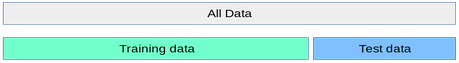

In [ ]:
#Porcentaje en la división utilizada: 0.2 = 20% (Test)
porcentaje = 0.2

In [ ]:
#Parametro generador de números aleatorios para aleatorizar la data de Train y Test
semilla = 500

In [ ]:
#Dividir Data con parametros
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=porcentaje, random_state=semilla)

**Modelo XGBoost**

In [ ]:
#Declarar el modelo en la variable "reg"

#n_estimators = Número de árboles de profundidad
reg = XGBClassifier(n_estimators=100)
#Entrenar el modelo con el comando "fit" a las variables -> X_train, y_train
reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

**Medir rendimiento del modelo**

In [ ]:
#Datos predecidos
y_pred = reg.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
#Datos actuales
y_test

,Outcome
132,1
636,0
743,1
159,1
395,0
...,...
751,0
512,0
254,1
329,0


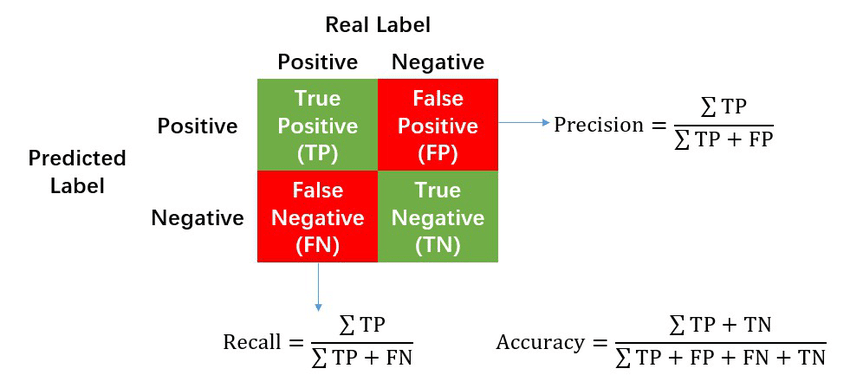

In [ ]:
#Calculamos el Accuracy del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
#Calculamos el Precision del modelo
precision = metrics.precision_score(y_test, y_pred)
#Calculamos el Recall del modelo
recall = metrics.recall_score(y_test, y_pred)

In [ ]:
#Imprimir las metricas calculadas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7987012987012987
Precision: 0.7291666666666666
Recall: 0.660377358490566


In [ ]:
#Calculamos matriz de confusión
matrix = metrics.confusion_matrix(y_test, y_pred)

In [ ]:
#Imprimir valores de la matriz
matrix

array([[88, 13],
       [18, 35]])

Text(33.0, 0.5, 'Actual')

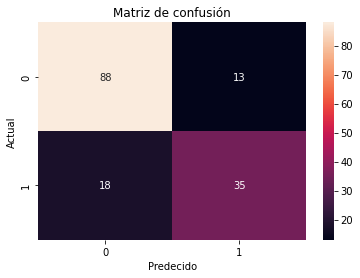

In [ ]:
#Dibuja un mapa de calor
f,ax=plt.subplots()
sns.heatmap(matrix,annot=True,ax=ax)
#Agregar titulos y etiquetas
ax.set_title('Matriz de confusión')
ax.set_xlabel('Predecido')
ax.set_ylabel('Actual')

In [ ]:
#Calcular valor del area bajo la curva ROC
y_pred_proba = reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [ ]:
#Imprimir valor del area bajo la curva ROC
print("AUC score es de: ", auc)

AUC score es de:  0.8447599476928824


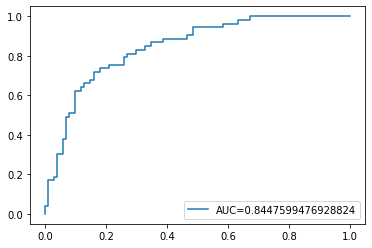

In [ ]:
#Graficar la curva ROC
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()